In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [237]:
df=pd.read_csv('C:/Users/rajat/Documents/ML_PROJECTS/BITCOIN_CLOSING/ETH_day.csv')


In [238]:
df.head()

,Date,Open,High,Low,Close,Volume ETH
0,4/15/2020,158.61,158.61,158.61,158.61,0.00
1,4/14/2020,156.97,162.15,155.74,158.61,18061.58
2,4/13/2020,158.56,159.51,150.12,156.97,15698.32
3,4/12/2020,158.66,165.37,155.21,158.56,12877.33
4,4/11/2020,158.26,161.49,154.25,158.66,13761.72


In [239]:
df.describe()                              ##Doing Data preperation

,Open,High,Low,Close,Volume ETH
count,1438.000000,1438.000000,1438.000000,1438.000000,1.438000e+03
mean,239.397149,248.919200,227.681446,239.468011,3.720638e+04
std,237.662224,248.677428,222.794938,237.606382,6.908336e+04
min,6.770000,7.290000,5.990000,6.770000,0.000000e+00
25%,79.782500,84.875000,74.677500,80.732500,7.020215e+03
50%,181.430000,187.020000,175.850000,181.430000,1.780439e+04
75%,297.735000,306.015000,287.427500,297.502500,4.204451e+04
max,1381.850000,1420.010000,1270.000000,1381.850000,1.827755e+06


In [240]:
df.dtypes                ##To see All Columns Data Type

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume ETH    float64
dtype: object

In [241]:
df['Date']=pd.to_datetime(df['Date'])  ##Converting Date format From Object to 'datetime' format bcoz 'Date' must support Timestamp nature

In [242]:
df['Date'].dtypes

dtype('<M8[ns]')

In [243]:
#Now We need to Sort data According to 'Date' to maintain the heirachy and update it in 'df'
df=df.sort_index()

In [244]:
df.head()

,Date,Open,High,Low,Close,Volume ETH
0,2020-04-15,158.61,158.61,158.61,158.61,0.00
1,2020-04-14,156.97,162.15,155.74,158.61,18061.58
2,2020-04-13,158.56,159.51,150.12,156.97,15698.32
3,2020-04-12,158.66,165.37,155.21,158.56,12877.33
4,2020-04-11,158.26,161.49,154.25,158.66,13761.72


In [245]:
#Must Condition of time Series use case is that 'Date' be row  index
#So we now make 'Date' as Index
df.set_index('Date',inplace=True)

In [246]:
df.head()

,Open,High,Low,Close,Volume ETH
Date,,,,,
2020-04-15,158.61,158.61,158.61,158.61,0.00
2020-04-14,156.97,162.15,155.74,158.61,18061.58
2020-04-13,158.56,159.51,150.12,156.97,15698.32
2020-04-12,158.66,165.37,155.21,158.56,12877.33
2020-04-11,158.26,161.49,154.25,158.66,13761.72


In [247]:
#date is Now Row index
#till now we did some basic data cleaning and data is ready for analysis

#Now we will do some EDA on data
data=df.copy()   #making copy of clean data in 'data'

In [248]:
data.head()

,Open,High,Low,Close,Volume ETH
Date,,,,,
2020-04-15,158.61,158.61,158.61,158.61,0.00
2020-04-14,156.97,162.15,155.74,158.61,18061.58
2020-04-13,158.56,159.51,150.12,156.97,15698.32
2020-04-12,158.66,165.37,155.21,158.56,12877.33
2020-04-11,158.26,161.49,154.25,158.66,13761.72


Text(0, 0.5, 'Bitcoin Price in $')

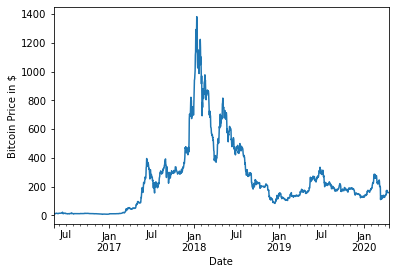

In [249]:
data['Close'].plot()    #plot 'close' value according to 'Date'
plt.ylabel('Bitcoin Price in $')  #to write label on y axis of line plot

In [250]:
# Main Goal is to Tackel the closing price so we'll Copy it in a new variable 'data2'
data2=data['Close']

In [251]:
data2.head()

Date
2020-04-15    158.61
2020-04-14    158.61
2020-04-13    156.97
2020-04-12    158.56
2020-04-11    158.66
Name: Close, dtype: float64

<AxesSubplot:xlabel='Date'>

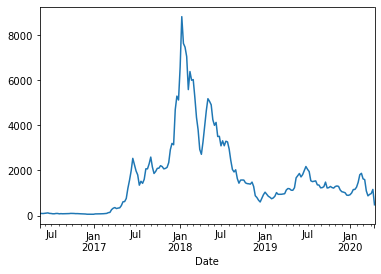

In [252]:
# Now we'll do re-sampling of Data
data2.resample('W').sum().plot()  #here we resample data on weekly bases by taking of sum of closing price
#and ploting data

<AxesSubplot:xlabel='Date'>

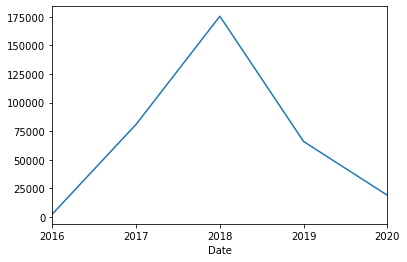

In [253]:
#now we'll try to resample data on yearly bases..with sum closing price
data2.resample('Y').sum().plot()

<AxesSubplot:xlabel='Date'>

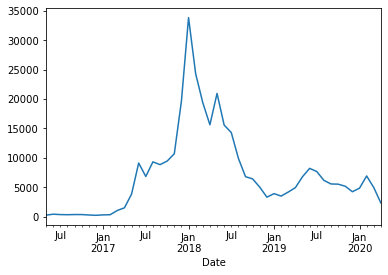

In [254]:
#now on mothly bases with closing price sum
data2.resample('M').sum().plot()

<AxesSubplot:xlabel='Date'>

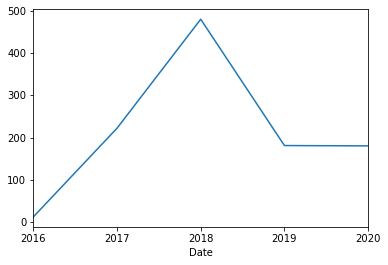

In [255]:
# Avg closing price with respect to diff. year
data2.resample('Y').mean().plot()

#similary we can apply min(),max(),count()

In [256]:
#to analyse data on wewkly bases we need to fist find day of week
data2.index.dayofweek

Int64Index([2, 1, 0, 6, 5, 4, 3, 2, 1, 0,
            ...
            2, 1, 0, 6, 5, 4, 3, 2, 1, 0],
           dtype='int64', name='Date', length=1438)

In [257]:
#After finding day of week we need to group-by every data according to avg. each day's closing price per week
weekday=data.groupby(data2.index.dayofweek)['Close'].mean() #let assign this data to'weekday'
weekday

Date
0    239.369320
1    239.787379
2    238.623786
3    237.319512
4    238.910780
5    241.239854
6    241.028488
Name: Close, dtype: float64

In [258]:
#above our data is grouped according to avg. each day on various week
#now replace day index with day name
weekday.index=['Mon','Tue','Wed','Thurs','Fri','Sat','Sun']


In [259]:
weekday

Mon      239.369320
Tue      239.787379
Wed      238.623786
Thurs    237.319512
Fri      238.910780
Sat      241.239854
Sun      241.028488
Name: Close, dtype: float64

<AxesSubplot:>

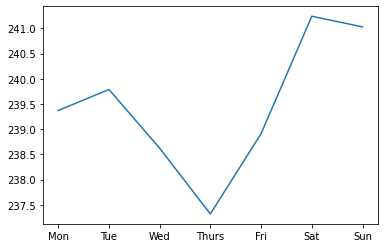

In [260]:
weekday.plot()  

In [261]:
#now we'll analize avg. closing price by day

days=data2.index.dayofyear

In [262]:
days

Int64Index([106, 105, 104, 103, 102, 101, 100,  99,  98,  97,
            ...
            139, 138, 137, 136, 135, 134, 133, 132, 131, 130],
           dtype='int64', name='Date', length=1438)

In [263]:
data.groupby(days)['Close'].mean()

Date
1      257.1850
2      287.2325
3      307.6925
4      311.6450
5      317.0600
         ...   
362    248.1375
363    255.6875
364    243.8125
365    251.0725
366      8.1000
Name: Close, Length: 366, dtype: float64

Text(0, 0.5, 'Avg Closing Price')

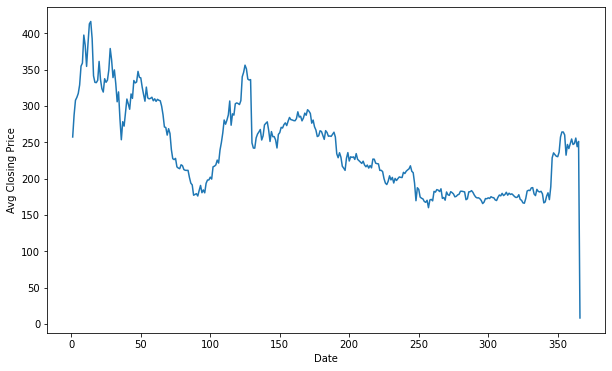

In [264]:
plt.figure(figsize=(10,6))        ## Resizing Image of graph
data.groupby(days)['Close'].mean().plot()
plt.ylabel('Avg Closing Price') #setting Y-Label

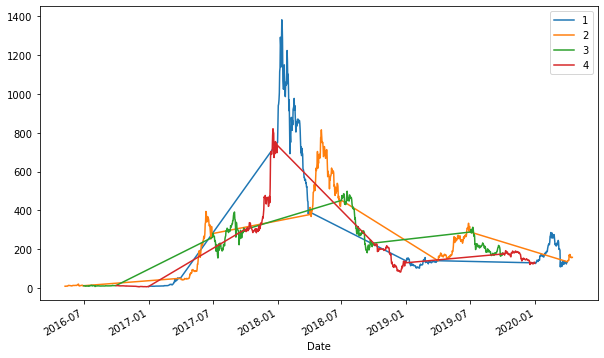

In [265]:
#plotting graph according to per Quater
plt.figure(figsize=(10,6))
data.groupby(data2.index.quarter)['Close'].plot()
plt.legend()           # Showing index color relationship with Quarter


In [266]:
# now firstly we need to define day whether it is a week day or weekend
#for this we use 'dayofweek' func. which will represent data as [0,1,2,3,4,5,6]
#if dayofweek<5 then it is a weekend a ; Adding weekend day coloumn in our data
data['dayofweek']=data.index.dayofweek

In [267]:
data.head()

,Open,High,Low,Close,Volume ETH,dayofweek
Date,,,,,,
2020-04-15,158.61,158.61,158.61,158.61,0.00,2
2020-04-14,156.97,162.15,155.74,158.61,18061.58,1
2020-04-13,158.56,159.51,150.12,156.97,15698.32,0
2020-04-12,158.66,165.37,155.21,158.56,12877.33,6
2020-04-11,158.26,161.49,154.25,158.66,13761.72,5


In [268]:
def assign_label(feature):
    if feature<5:
        return 'weekdays'
    else:
        return 'weekends'

In [269]:
data['dayofweek']=data['dayofweek'].apply(assign_label)   #Assinging label to per date acco. to weekday or weekends
#and adding it in data table as seprate coloumn

In [270]:
data.head()

,Open,High,Low,Close,Volume ETH,dayofweek
Date,,,,,,
2020-04-15,158.61,158.61,158.61,158.61,0.00,weekdays
2020-04-14,156.97,162.15,155.74,158.61,18061.58,weekdays
2020-04-13,158.56,159.51,150.12,156.97,15698.32,weekdays
2020-04-12,158.66,165.37,155.21,158.56,12877.33,weekends
2020-04-11,158.26,161.49,154.25,158.66,13761.72,weekends


In [271]:
data[data['dayofweek']=='weekends'].head()  #plotting All weekends from data

,Open,High,Low,Close,Volume ETH,dayofweek
Date,,,,,,
2020-04-12,158.66,165.37,155.21,158.56,12877.33,weekends
2020-04-11,158.26,161.49,154.25,158.66,13761.72,weekends
2020-04-05,144.73,145.80,141.00,143.04,7986.14,weekends
2020-04-04,141.46,146.50,138.82,144.73,19744.24,weekends
2020-03-29,131.27,132.00,123.87,124.50,9427.22,weekends


<AxesSubplot:title={'center':'weekdays'}, xlabel='Date'>

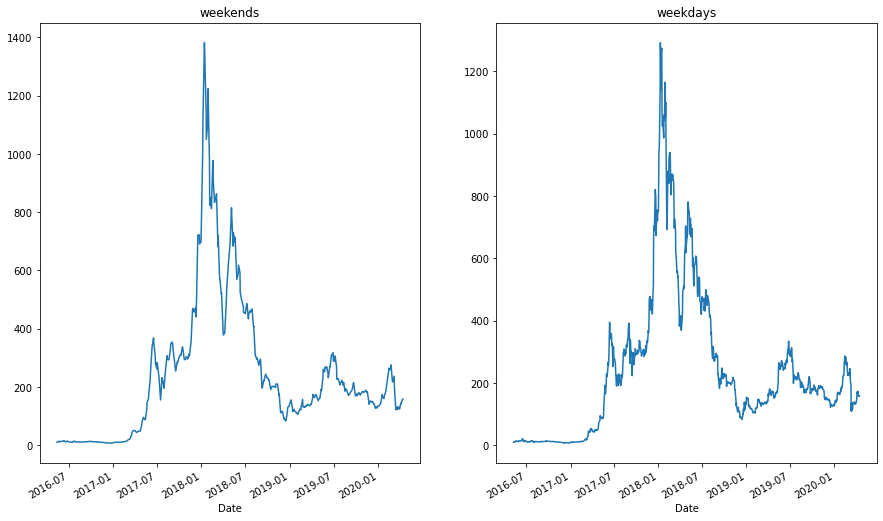

In [272]:
#Now we will plot 2 chart {1-acc. to weekends ; 2-acc. to weekdays}
fig,ax=plt.subplots(1,2,figsize=(15,9))  #Making 2 Figure fig,ax of 15,9 size
#ploting graph in 1st block
data[data['dayofweek']=='weekends']['Close'].plot(ax=ax[0],title='weekends')
data[data['dayofweek']=='weekdays']['Close'].plot(ax=ax[1],title='weekdays')

In [273]:
#doing prediction using 'Naive model'
data['prediction_naive']=data['Close'].shift(1) #adding a new col. and storing predictive value calculated by shift() from position 1

In [274]:
data.head()

,Open,High,Low,Close,Volume ETH,dayofweek,prediction_naive
Date,,,,,,,
2020-04-15,158.61,158.61,158.61,158.61,0.00,weekdays,NaN
2020-04-14,156.97,162.15,155.74,158.61,18061.58,weekdays,158.61
2020-04-13,158.56,159.51,150.12,156.97,15698.32,weekdays,158.61
2020-04-12,158.66,165.37,155.21,158.56,12877.33,weekends,156.97
2020-04-11,158.26,161.49,154.25,158.66,13761.72,weekends,158.56


<AxesSubplot:xlabel='Date'>

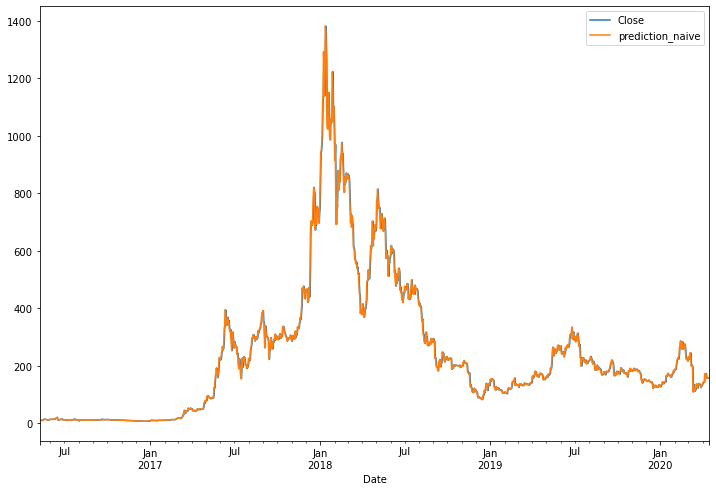

In [275]:
#ploting prediction
data[['Close','prediction_naive']].plot(figsize=(12,8))

In [276]:
#now we will found aut error or accuracy ; we use mean_squared_error
from sklearn.metrics import mean_squared_error

In [277]:
mean_squared_error(data['Close'][1:],data['prediction_naive'][1:]) 
#here we find mean square error between 'close' data from 'data' and prediction
#o/p is square value so we need to take under root of it

453.7669399443285

In [278]:
np.sqrt(mean_squared_error(data['Close'][1:],data['prediction_naive'][1:]))

21.30180602541316

<AxesSubplot:xlabel='Date'>

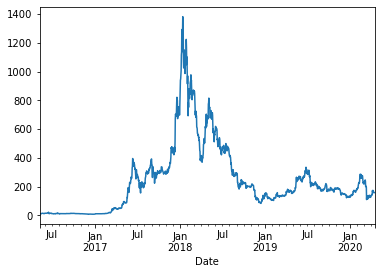

In [279]:
#Examine seasonality or Noise in Our Data
data['Close'].plot()


In [280]:
# There are some seeasonality in data .. we need to remove it and make it static
mean=data['Close'].rolling(window=7).mean()  #mean {from 1to7 then 2to8....}
std=data['Close'].rolling(window=7).std()  #Standard Deviation


In [281]:
mean

Date
2020-04-15          NaN
2020-04-14          NaN
2020-04-13          NaN
2020-04-12          NaN
2020-04-11          NaN
                ...    
2016-05-13    11.771429
2016-05-12    11.157143
2016-05-11    10.747143
2016-05-10    10.382857
2016-05-09    10.184286
Name: Close, Length: 1438, dtype: float64

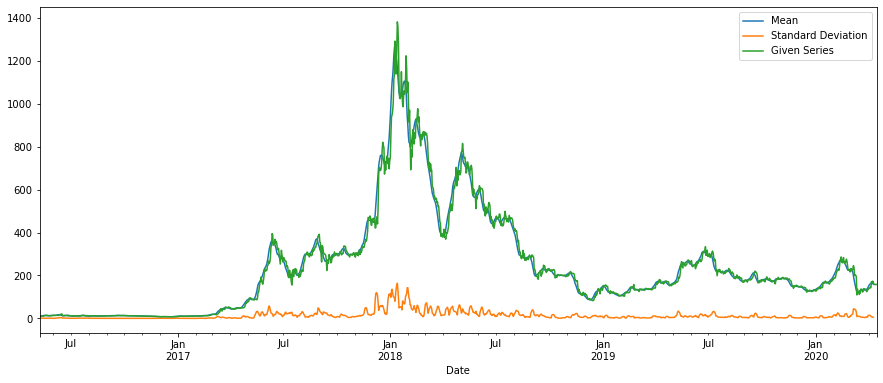

In [282]:
#Now Ploting mean ,std. and given series
plt.figure(figsize=(15,6))
mean.plot(label='Mean')
std.plot(label='Standard Deviation')
data['Close'].plot(label='Given Series')
plt.legend()

In [283]:
#above mean std. is not static..it is changing with time..so we need to remove this seasonality
from statsmodels.tsa.stattools import adfuller

In [284]:
data['Close'].isnull().sum()   # to check if any null values in our data

0

In [285]:
#there is  no null value

In [286]:
adfuller(data['Close'])

(-1.9543269946225135,
 0.3069509298095086,
 24,
 1413,
 {'1%': -3.4349863902854607,
  '5%': -2.863587640846308,
  '10%': -2.567860154259632},
 12555.430919327313)

In [287]:
#above p value=.0002154.. <.5 so null hypothesis rejected : so data is stationary
#now store this data 
result=adfuller(data['Close'])
labels=['ADf Test Statistics','P-value','lags used','No. of obs used']

#combining result data and 'labels'
for value,label in zip(result,labels):
    print('{} : {}'.format(label,value))


ADf Test Statistics : -1.9543269946225135
P-value : 0.3069509298095086
lags used : 24
No. of obs used : 1413


In [288]:
#now we will automate above step of checking stationarity
def test_for_stationerity(feature):
    mean=data[feature].rolling(window=7).mean() 
    std=data[feature].rolling(window=7).std()
    
    plt.figure(figsize=(15,6))
    mean.plot(label='Mean')
    std.plot(label='Standard Deviation')
    data[feature].plot(label='Given Series')
    plt.legend()
    
    result=adfuller(data[feature].dropna())
    labels=['ADf Test Statistics','P-value','lags used','No. of obs used']

    for value,label in zip(result,labels):
        print('{} : {}'.format(label,value))
    if result[1]<=0.5:
        print('Strong Evidence Against Null Hypothesis & Reject this Null Hypo. and Data is Stationary')
    else:
        print('Strong Evidence Against Null Hypothesis & Reject this Null Hypo. and Data is Stationary')


ADf Test Statistics : -1.9543269946225135
P-value : 0.3069509298095086
lags used : 24
No. of obs used : 1413
Strong Evidence Against Null Hypothesis & Reject this Null Hypo. and Data is Stationary


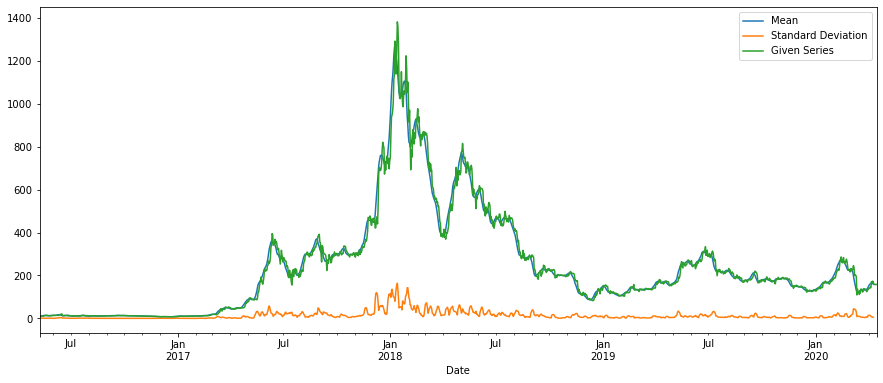

In [289]:
test_for_stationerity('Close')

<AxesSubplot:xlabel='Date'>

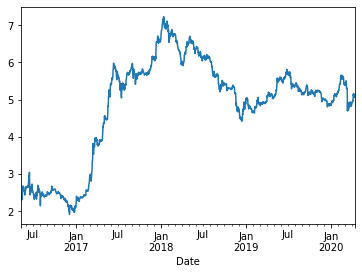

In [290]:
#now applying log transformation
log_data=np.log(data['Close'])
np.log(data['Close']).plot()

In [291]:
#computing rolling avg
rolling_avg=log_data-log_data.shift(7)  #shifting by 7 

In [292]:
Rolling_average=log_data.rolling(window=7).mean()

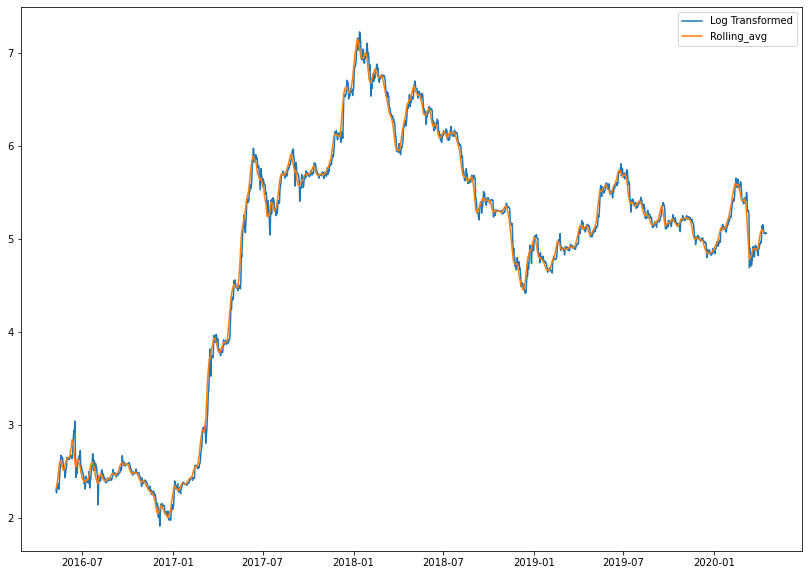

In [293]:
plt.figure(figsize=(14,10))
plt.plot(log_data,label='Log Transformed')
plt.plot(Rolling_average,label='Rolling_avg')
plt.legend()

In [294]:
lr_diff=log_data-Rolling_average

In [295]:
lr_diff

Date
2020-04-15         NaN
2020-04-14         NaN
2020-04-13         NaN
2020-04-12         NaN
2020-04-11         NaN
                ...   
2016-05-13   -0.088111
2016-05-12   -0.084780
2016-05-11   -0.027756
2016-05-10   -0.068976
2016-05-09   -0.019827
Name: Close, Length: 1438, dtype: float64

In [296]:
#assingning all value in data-frame
data['lr_diff']=lr_diff

ADf Test Statistics : -10.759709501044542
P-value : 2.5392394289642702e-19
lags used : 6
No. of obs used : 1425
Strong Evidence Against Null Hypothesis & Reject this Null Hypo. and Data is Stationary


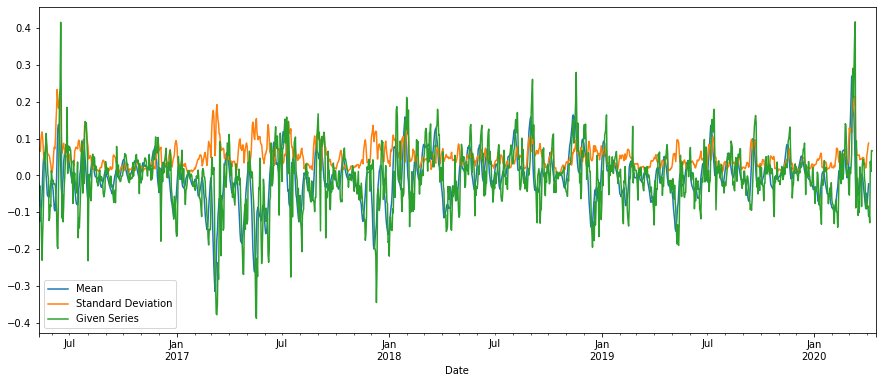

In [297]:
test_for_stationerity('lr_diff')

In [298]:
log_ts=log_data-log_data.shift(7)

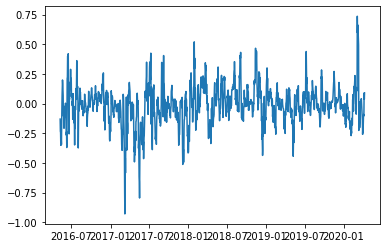

In [299]:
plt.plot(log_ts)    #w.r.t seasonality we have this trend

ADf Test Statistics : -6.124688666568088
P-value : 8.686049183376238e-08
lags used : 24
No. of obs used : 1406
Strong Evidence Against Null Hypothesis & Reject this Null Hypo. and Data is Stationary


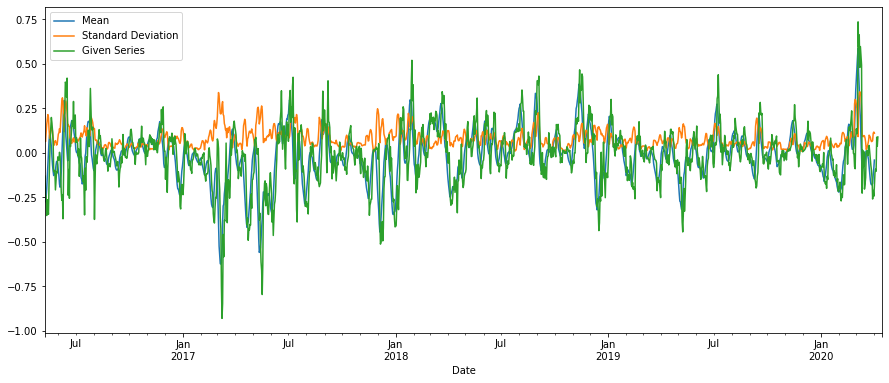

In [300]:
#ploting this data with stationarity test
data['log_ts']=log_ts
test_for_stationerity('log_ts')

In [301]:
#Finally doing Forecast using Prophet Model 

In [302]:
!pip install fbprophet

In [319]:
from fbprophet import Prophet

In [320]:
model=Prophet()

In [321]:
data.head()

,Open,High,Low,Close,Volume ETH,dayofweek,prediction_naive,lr_diff,log_ts
Date,,,,,,,,,
2020-04-15,158.61,158.61,158.61,158.61,0.00,weekdays,NaN,NaN,NaN
2020-04-14,156.97,162.15,155.74,158.61,18061.58,weekdays,158.61,NaN,NaN
2020-04-13,158.56,159.51,150.12,156.97,15698.32,weekdays,158.61,NaN,NaN
2020-04-12,158.66,165.37,155.21,158.56,12877.33,weekends,156.97,NaN,NaN
2020-04-11,158.26,161.49,154.25,158.66,13761.72,weekends,158.56,NaN,NaN


In [322]:
df=data[['Close']]

In [323]:
df.head()

,Close
Date,
2020-04-15,158.61
2020-04-14,158.61
2020-04-13,156.97
2020-04-12,158.56
2020-04-11,158.66


In [324]:
df=df.reset_index()

In [325]:
df.columns=['ds','y']

In [326]:
df.head()

,ds,y
0,2020-04-15,158.61
1,2020-04-14,158.61
2,2020-04-13,156.97
3,2020-04-12,158.56
4,2020-04-11,158.66


In [327]:
m=model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [328]:
future=m.make_future_dataframe(periods=500,freq='D')

In [329]:
future.head()

,ds
0,2016-05-09
1,2016-05-10
2,2016-05-11
3,2016-05-12
4,2016-05-13


In [330]:
data.shape

(1438, 9)

In [331]:
future.shape

(1938, 1)

In [332]:
forecast=m.predict(future)

In [333]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-05-09,-55.065089,-90.868473,83.784884,-55.065089,-55.065089,50.125546,50.125546,50.125546,0.481288,0.481288,0.481288,49.644259,49.644259,49.644259,0.0,0.0,0.0,-4.939542
1,2016-05-10,-54.680536,-91.070095,89.646958,-54.680536,-54.680536,52.484261,52.484261,52.484261,0.786838,0.786838,0.786838,51.697423,51.697423,51.697423,0.0,0.0,0.0,-2.196275
2,2016-05-11,-54.295983,-86.075226,86.192686,-54.295983,-54.295983,52.871322,52.871322,52.871322,-0.496454,-0.496454,-0.496454,53.367775,53.367775,53.367775,0.0,0.0,0.0,-1.424662
3,2016-05-12,-53.911431,-85.518288,87.244974,-53.911431,-53.911431,52.338742,52.338742,52.338742,-2.339082,-2.339082,-2.339082,54.677824,54.677824,54.677824,0.0,0.0,0.0,-1.572688
4,2016-05-13,-53.526878,-85.426336,89.638588,-53.526878,-53.526878,54.806432,54.806432,54.806432,-0.850428,-0.850428,-0.850428,55.656860,55.656860,55.656860,0.0,0.0,0.0,1.279554


In [334]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
1928,2021-08-19,306.488434,-700.099780,1354.518073
1929,2021-08-20,307.902779,-713.686915,1366.421519
1930,2021-08-21,309.943007,-708.482514,1335.258884
1931,2021-08-22,309.312983,-683.043855,1339.024230
1932,2021-08-23,308.301670,-704.027292,1330.284291
1933,2021-08-24,308.010330,-712.596604,1336.962678
1934,2021-08-25,305.971511,-709.896222,1325.909165
1935,2021-08-26,303.211523,-711.050724,1330.732536
1936,2021-08-27,303.622239,-729.190569,1339.949904
1937,2021-08-28,304.610861,-721.742579,1346.633109


In [335]:
#plot our forecast

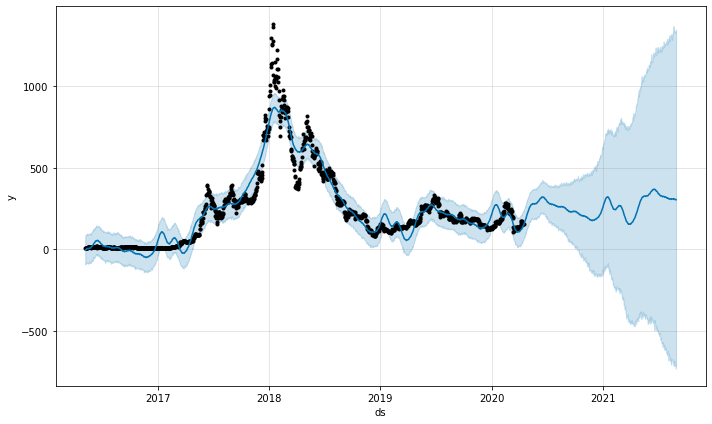

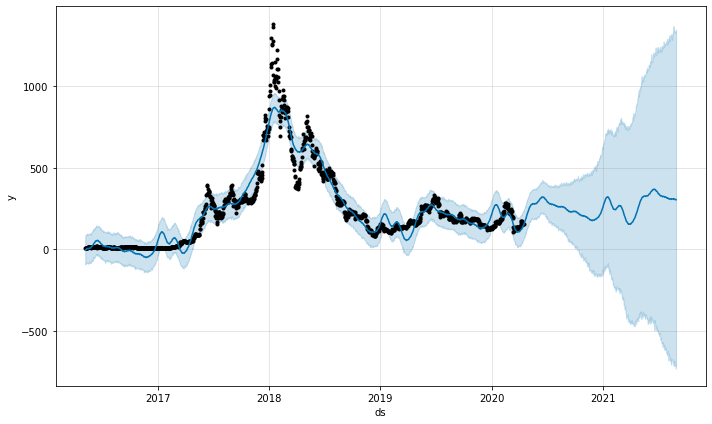

In [336]:
model.plot(forecast)

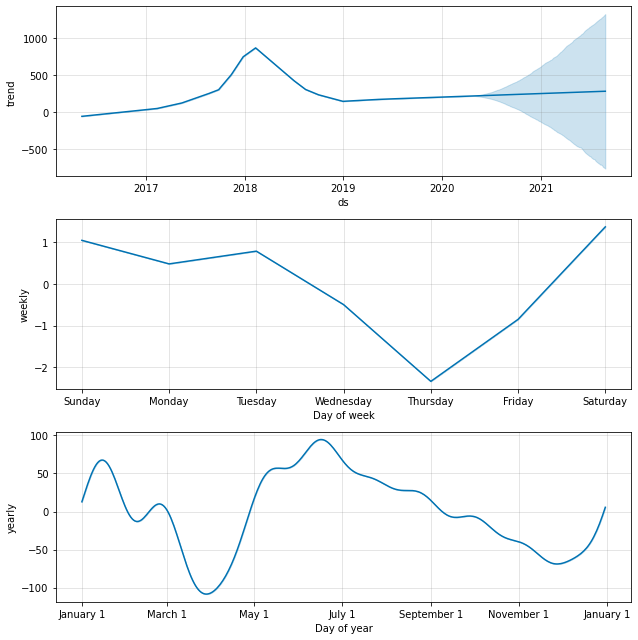

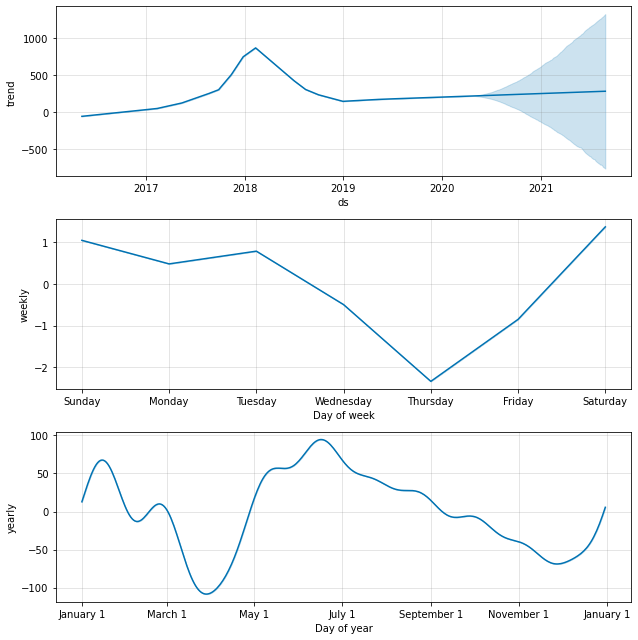

In [337]:
model.plot_components(forecast)

In [342]:
from fbprophet.diagnostics import cross_validation

In [344]:
df.shape

(1438, 2)

In [350]:
df_cv=cross_validation(model,horizon='365 days',period='180 Days',initial='1000 days')

INFO:fbprophet:Making 1 forecasts with cutoffs between 2019-04-16 00:00:00 and 2019-04-16 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

In [351]:
df_cv.shape

(365, 6)

In [352]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-04-17,114.179076,26.359172,193.576075,166.61,2019-04-16
1,2019-04-18,119.697206,41.198390,206.297831,173.69,2019-04-16
2,2019-04-19,128.299482,49.107623,208.543694,174.24,2019-04-16
3,2019-04-20,139.164927,59.939705,222.035725,173.89,2019-04-16
4,2019-04-21,147.131042,62.261266,226.775125,170.13,2019-04-16


In [353]:
from fbprophet.plot import plot_cross_validation_metric

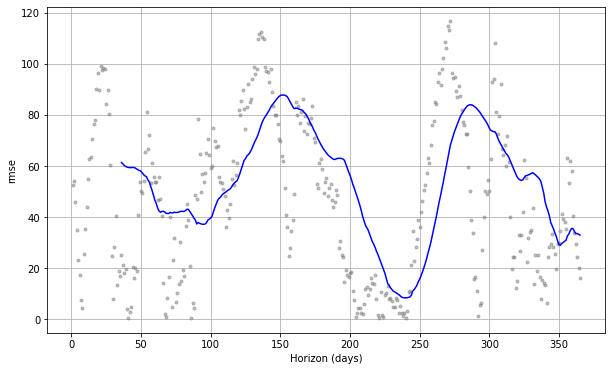

In [354]:
fig=plot_cross_validation_metric(df_cv,metric='rmse')

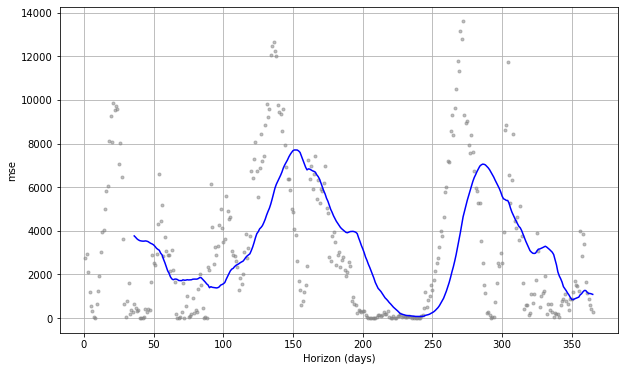

In [355]:
fig=plot_cross_validation_metric(df_cv,metric='mse')